In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

In [137]:
train = pd.read_excel("international Bowler.xlsx")
test = pd.read_excel("bowler dataset.xlsx")
temp = pd.read_excel("bowler dataset1.xlsx")
name = temp.Name
train.shape,test.shape

((24, 80), (37, 80))

In [138]:
name

0          Sanzmul Islam (AL)
1            Taskin Ahmed(AL)
2      Mehidy Hasan Miraz(AL)
3              Sandip Roy(AL)
4         Mohhamad Shahid(LR)
5              Asif Hasan(LR)
6        Mosarraf Hossain(LR)
7              Syed Rasel(LR)
8          Tanvir Islam(KSKS)
9       Mohhamad Sadman(KSKS)
10          Abdul Halim(KSKS)
11          Masum Kahan(KSKS)
12         Hasan Mahmud(KSKS)
13         Arafat Sunny(PDSC)
14          Sharifullah(PDSC)
15        Mamun Hossain(PDSC)
16      Salauddin Sakil(PDSC)
17         Nazmul Islam(SJDC)
18          Shohag Gazi(SJDC)
19         Eilias Sunny(SJDC)
20         Robiul Haque(SJDC)
21            Abu Haider(GGC)
22          Mahedi Islam(GGC)
23          Nayeem Islam(GGC)
24           Tipu Sultan(GGC)
25             Qazi Anik(MSC)
26          Taijul Islam(MSC)
27          Enamul Haque(MSC)
28         Mohammad Azim(MSC)
29    Mohammad Saifuddin(SCC)
30         Shuvagata Hom(SCC)
31       Naeem Islam Jnr(SCC)
32          Raihan Uddin(SCC)
33        

In [139]:
# A new column name selected to determine if a player is selcted or not
train['Selected'] = 1
train.iloc[12:,-1] = 0

In [140]:
new_train = train.iloc[:,75:]
new_test = test.iloc[13:,75:]
new_train.shape,new_test.shape

((24, 6), (24, 5))

In [141]:
new_train.drop(columns= ['5W' ,'3W'], inplace = True)
new_test.drop(columns= ['5W' ,'10W'], inplace = True)

In [142]:
new_test.head()

,Avg,ECO,SR
13,30.266667,5.044444,36.000000
14,38.636364,5.059524,45.818182
15,26.333333,5.077121,31.120000
16,33.250000,5.115385,39.000000
17,26.133333,4.531792,34.600000


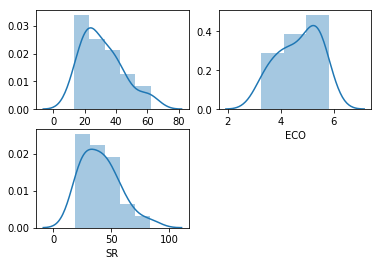

In [143]:
plt.subplot(221)
sns.distplot(new_train['Avg']);
plt.subplot(222)
sns.distplot(new_train['ECO']);
plt.subplot(223)
sns.distplot(new_train['SR']);

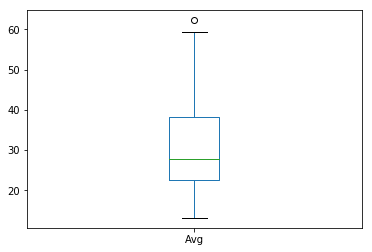

In [144]:
new_train['Avg'].plot.box()



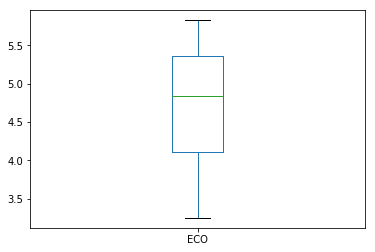

In [145]:
new_train['ECO'].plot.box()

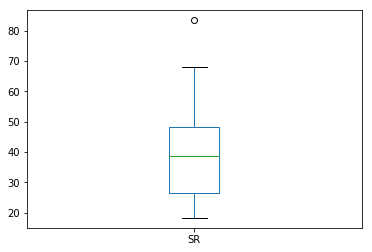

In [146]:
new_train['SR'].plot.box()

In [147]:

#Separating target variable
X = new_train.drop('Selected',1)
y = new_train.Selected
type(y)

pandas.core.series.Series

# Logistic Regression

In [148]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_test = new_train.Selected

In [150]:
y_test.shape

(24,)

In [151]:
import matplotlib
#matplotlib.use('TKAgg') # matplotlib renderer for windows

import matplotlib.pyplot as pl
pred_test = model.predict(new_test)
#pred_test
x = pred_test
names=np.array(name)
arr2=np.array(x)
arr2
g=len(arr2)
counter = 0 
while (counter < 24): 
    if arr2[counter]==1:
        c=names[counter]
        
        print(counter,".", c, " =", "✔")
    else:
        
        print(counter,".", c, " = ", "✘")
    counter += 1



0 . Robiul Haque(SJDC)  =  ✘
1 . Robiul Haque(SJDC)  =  ✘
2 . Robiul Haque(SJDC)  =  ✘
3 . Robiul Haque(SJDC)  =  ✘
4 . Mohhamad Shahid(LR)  = ✔
5 . Asif Hasan(LR)  = ✔
6 . Mosarraf Hossain(LR)  = ✔
7 . Syed Rasel(LR)  = ✔
8 . Tanvir Islam(KSKS)  = ✔
9 . Mohhamad Sadman(KSKS)  = ✔
10 . Mohhamad Sadman(KSKS)  =  ✘
11 . Masum Kahan(KSKS)  = ✔
12 . Hasan Mahmud(KSKS)  = ✔
13 . Hasan Mahmud(KSKS)  =  ✘
14 . Hasan Mahmud(KSKS)  =  ✘
15 . Mamun Hossain(PDSC)  = ✔
16 . Mamun Hossain(PDSC)  =  ✘
17 . Mamun Hossain(PDSC)  =  ✘
18 . Mamun Hossain(PDSC)  =  ✘
19 . Mamun Hossain(PDSC)  =  ✘
20 . Robiul Haque(SJDC)  = ✔
21 . Robiul Haque(SJDC)  =  ✘
22 . Robiul Haque(SJDC)  =  ✘
23 . Robiul Haque(SJDC)  =  ✘


In [152]:
cm = confusion_matrix(y_test,pred_test)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

True positive =  9
False positive =  3
False negative =  5
True negative =  7


In [153]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)

print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")

Accuracy =  66.66666666666666 %
Sensitivity =  58.333333333333336 %
Specificity =  75.0 %


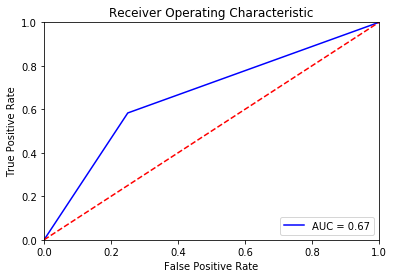

0.6666666666666666

In [154]:
fpr, tpr, _ = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

# SVM

In [155]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
import matplotlib
#matplotlib.use('TKAgg') # matplotlib renderer for windows

import matplotlib.pyplot as pl
pred_test = model.predict(new_test)
#pred_test
x = pred_test
names=np.array(name)
arr2=np.array(x)
arr2
g=len(arr2)
counter = 0 
while (counter < 24): 
    if arr2[counter]==1:
        c=names[counter]
        
        print(counter,".", c, " =", "✔")
    else:
        
        print(counter,".", c, " = ", "✘")
    counter += 1

0 . Robiul Haque(SJDC)  =  ✘
1 . Robiul Haque(SJDC)  =  ✘
2 . Robiul Haque(SJDC)  =  ✘
3 . Robiul Haque(SJDC)  =  ✘
4 . Mohhamad Shahid(LR)  = ✔
5 . Asif Hasan(LR)  = ✔
6 . Mosarraf Hossain(LR)  = ✔
7 . Syed Rasel(LR)  = ✔
8 . Tanvir Islam(KSKS)  = ✔
9 . Mohhamad Sadman(KSKS)  = ✔
10 . Mohhamad Sadman(KSKS)  =  ✘
11 . Masum Kahan(KSKS)  = ✔
12 . Hasan Mahmud(KSKS)  = ✔
13 . Hasan Mahmud(KSKS)  =  ✘
14 . Hasan Mahmud(KSKS)  =  ✘
15 . Mamun Hossain(PDSC)  = ✔
16 . Mamun Hossain(PDSC)  =  ✘
17 . Mamun Hossain(PDSC)  =  ✘
18 . Mamun Hossain(PDSC)  =  ✘
19 . Mamun Hossain(PDSC)  =  ✘
20 . Robiul Haque(SJDC)  = ✔
21 . Robiul Haque(SJDC)  =  ✘
22 . Robiul Haque(SJDC)  =  ✘
23 . Robiul Haque(SJDC)  =  ✘


In [157]:
cm = confusion_matrix(y_test,pred_test)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)
print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")
  

True positive =  9
False positive =  3
False negative =  4
True negative =  8
Accuracy =  70.83333333333334 %
Sensitivity =  66.66666666666666 %
Specificity =  75.0 %


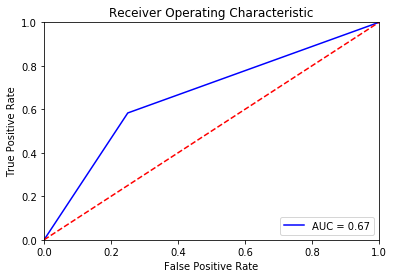

0.6666666666666666

In [159]:
fpr, tpr, _ = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

# Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2) 
dt.fit(X, y)  
pred_test = dt.predict(new_test)

True positive =  8
False positive =  4
False negative =  7
True negative =  5
Accuracy =  54.166666666666664 %
Sensitivity =  41.66666666666667 %
Specificity =  66.66666666666666 %


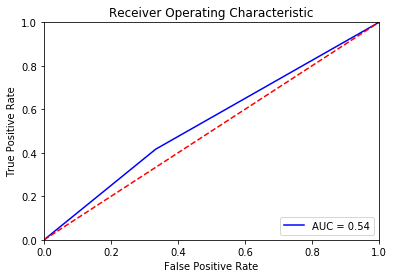

0.5416666666666667

In [161]:
cm = confusion_matrix(y_test,pred_test)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)
print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")


fpr, tpr, _ = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

# Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB
dt = GaussianNB()  
dt.fit(X, y)  
pred_test = dt.predict(new_test) 

True positive =  8
False positive =  4
False negative =  3
True negative =  9
Accuracy =  70.83333333333334 %
Sensitivity =  75.0 %
Specificity =  66.66666666666666 %


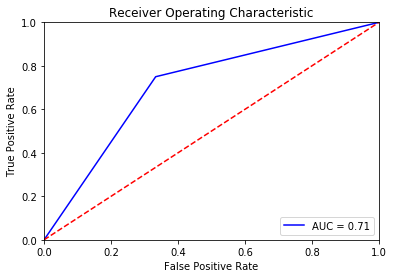

0.7083333333333334

In [163]:
cm = confusion_matrix(y_test,pred_test)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)
print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")


fpr, tpr, _ = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc